# Exercises
**Remember to document your thoughts and any takeaways as you work through visualizations!**

In [1]:
import numpy as np
import pandas as pd

from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import prepare as pr

In [2]:
# plotting defaults
plt.rc("font", size=12)
plt.rc("figure", figsize=(16, 8))
plt.style.use("seaborn-whitegrid")

---
**Using your store items data you prepped in lesson 2 exercises:**

In [3]:
sales = pr.wrangle_sales()
sales

,quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sale_amount
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,9,TX,78221,December,Sunday,87.57
2017-12-31 00:00:00+00:00,32.0,620840,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,10,TX,78231,December,Sunday,133.44
2017-12-31 00:00:00+00:00,55.0,622666,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,December,Sunday,285.45


In [4]:
sales.index.min()

Timestamp('2013-01-01 00:00:00+0000', tz='GMT')

In [5]:
sales.index.max()

Timestamp('2017-12-31 00:00:00+0000', tz='GMT')

In [6]:
sales = pd.DataFrame(sales.sale_amount.resample("D").sum())
sales

,sale_amount
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85
...,...
2017-12-27 00:00:00+00:00,109151.15
2017-12-28 00:00:00+00:00,117377.49
2017-12-29 00:00:00+00:00,126541.84


## 1. Split your data into train and test using the `sklearn.model_selection.TimeSeriesSplit` method.

In [7]:
from sklearn.model_selection import TimeSeriesSplit

In [8]:
TimeSeriesSplit(n_splits=2)

TimeSeriesSplit(max_train_size=None, n_splits=2)

### Human based train/test split

In [9]:
train = sales[:"2016"]
test = sales["2017"]

print(f"min date in train DataFrame = {train.index.min()}")
print(f"max date in train DataFrame = {train.index.max()}")
train.head()

min date in train DataFrame = 2013-01-01 00:00:00+00:00
max date in train DataFrame = 2016-12-31 00:00:00+00:00


,sale_amount
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


In [10]:
print(f"min date in test DataFrame = {test.index.min()}")
print(f"max date in test DataFrame = {test.index.max()}")
test.head()

min date in test DataFrame = 2017-01-01 00:00:00+00:00
max date in test DataFrame = 2017-12-31 00:00:00+00:00


,sale_amount
sale_date,
2017-01-01 00:00:00+00:00,127262.71
2017-01-02 00:00:00+00:00,85329.98
2017-01-03 00:00:00+00:00,100389.65
2017-01-04 00:00:00+00:00,99454.59
2017-01-05 00:00:00+00:00,107613.80


## 2. Validate your splits by plotting X_train and y_train.

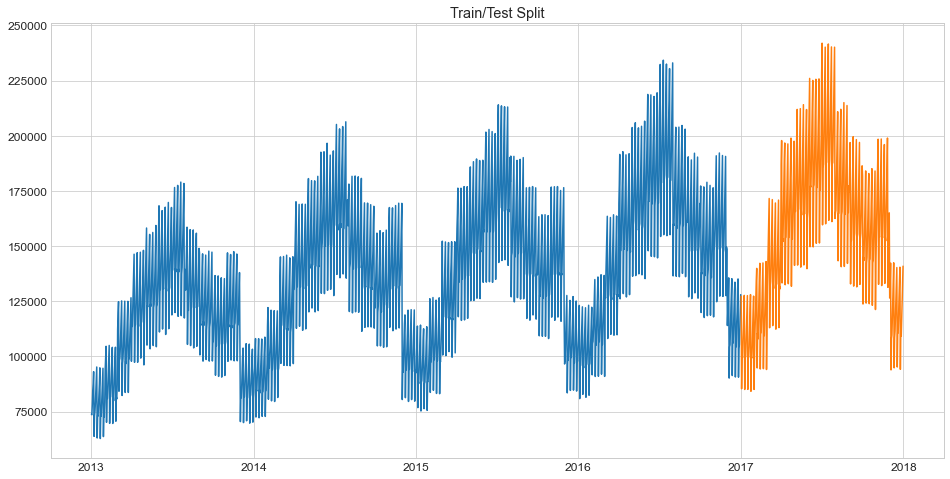

In [11]:
X_train = train.index
y_train = train.sale_amount

X_test = test.index
y_test = test.sale_amount

plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.title("Train/Test Split")
plt.show()

> Here we see the train/test split. Train is in blue and contains data from 2013-01-01 through 2016-12-31. Test holds only data for 2017

## 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

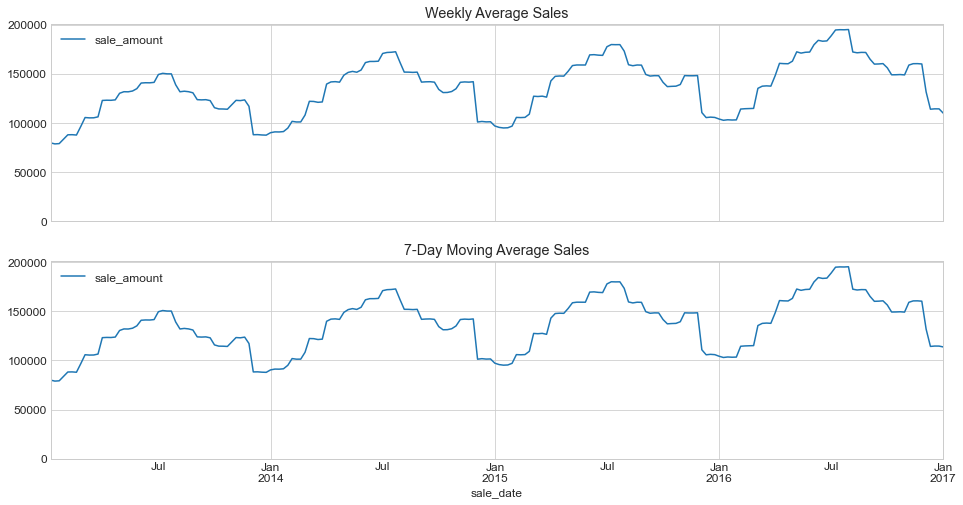

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))

train.resample("W").sale_amount.mean().plot(ax=ax1)
ax1.set_title("Weekly Average Sales")
ax1.set_ylim(0, ax1.get_ybound()[1])
ax1.legend()

train.rolling(7).mean().plot(ax=ax2)
ax2.set_title("7-Day Moving Average Sales")
ax2.set_ylim(0, ax2.get_ybound()[1])
ax2.legend()

plt.show()

> Looks like these two plot show the same seasonality and slight upward trend. Just two different ways to think about weekly averages.

## 4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

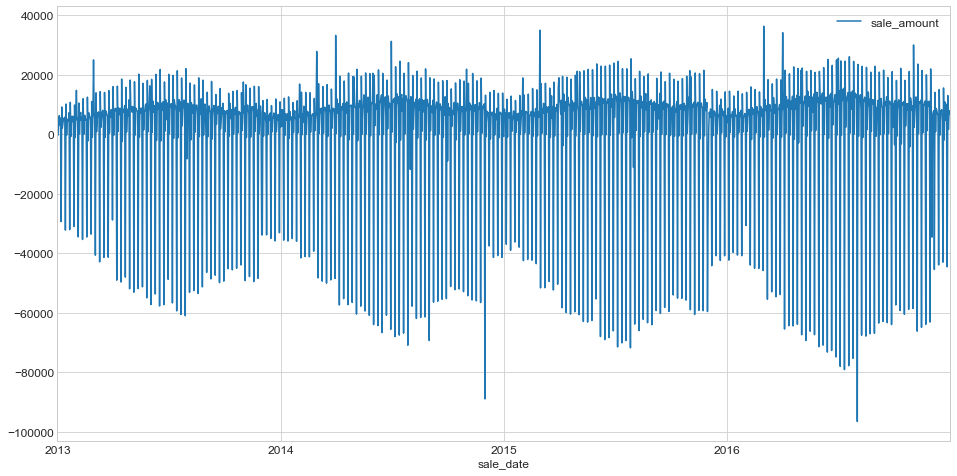

In [13]:
train.diff().plot()
plt.show()

> Looks like there's a lot of variance in daily sales

## 5. Plot a time series decomposition.

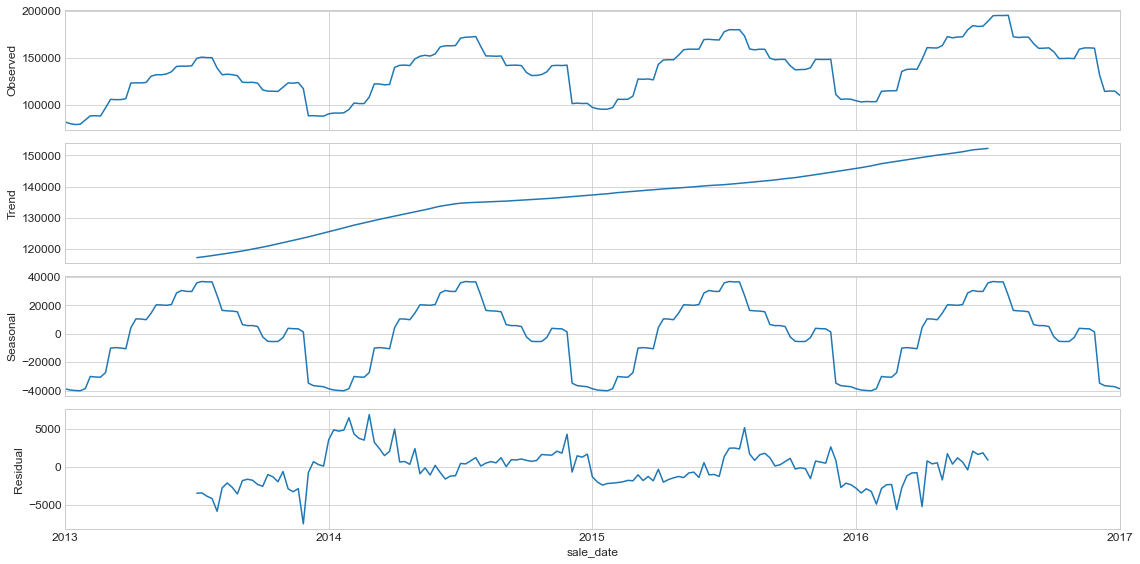

In [14]:
decomposition = sm.tsa.seasonal_decompose(train.resample("W").mean())

fig = decomposition.plot()

## 6. Create a lag plot (day over day).

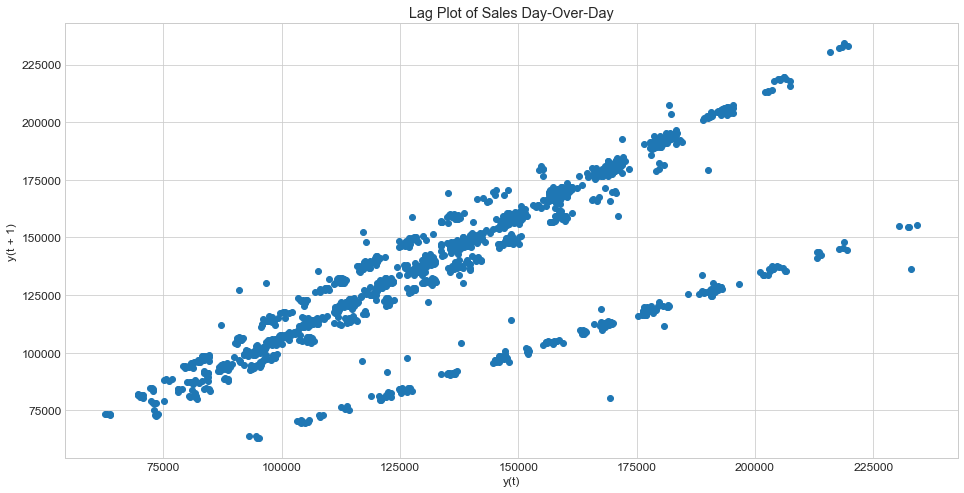

In [15]:
pd.plotting.lag_plot(train)
plt.title("Lag Plot of Sales Day-Over-Day")
plt.show()

## 7. Run a lag correlation.

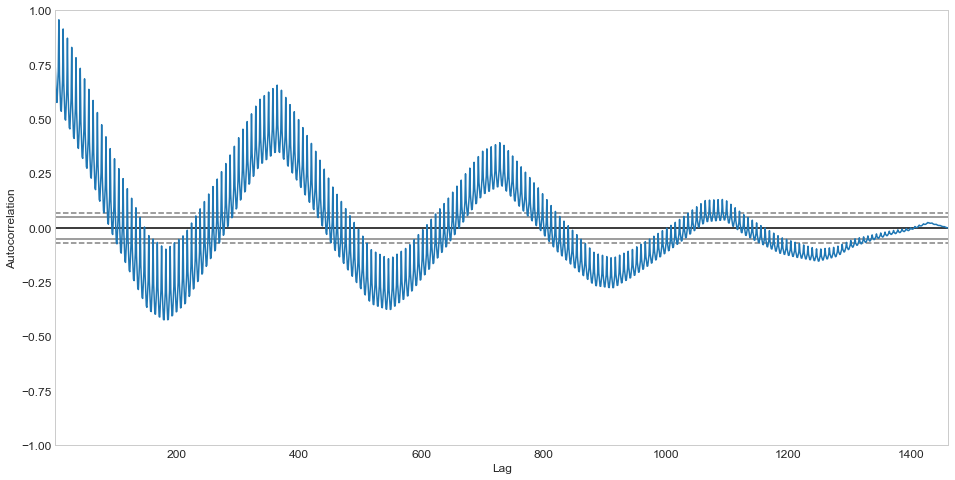

In [16]:
pd.plotting.autocorrelation_plot(train)
plt.show()

---
**Using your OPS data you prepped in lesson 2 exercises:**

In [17]:
germany = pr.wrangle_germany()
germany

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


---
## 1. Split your data into train and test using the percent cutoff method.

## 2. Validate your splits by plotting X_train and y_train.

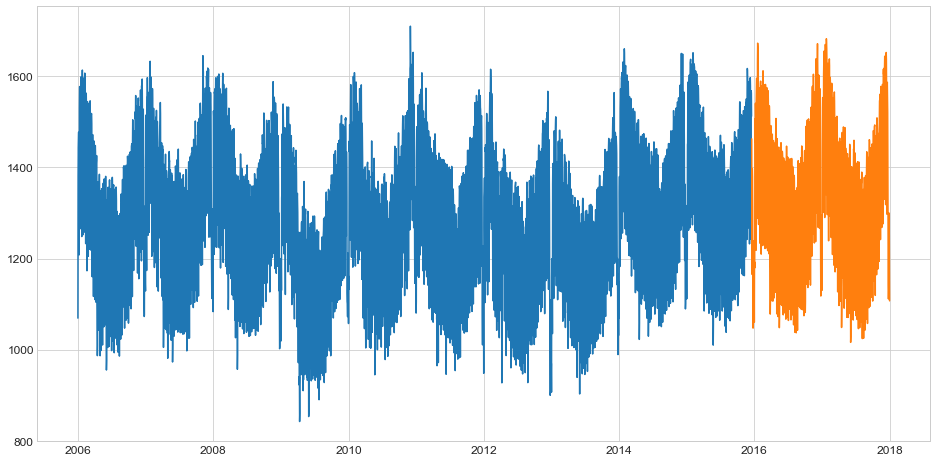

In [18]:
train_size = .83
n = germany.shape[0]
test_start_index = round(train_size * n)

train = germany[:test_start_index]
test = germany[test_start_index:]

X_train = train.index
y_train = train.Consumption

X_test = test.index
y_test = test.Consumption

plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.show()

> Here we can see the train/test split using a percentage.

## 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

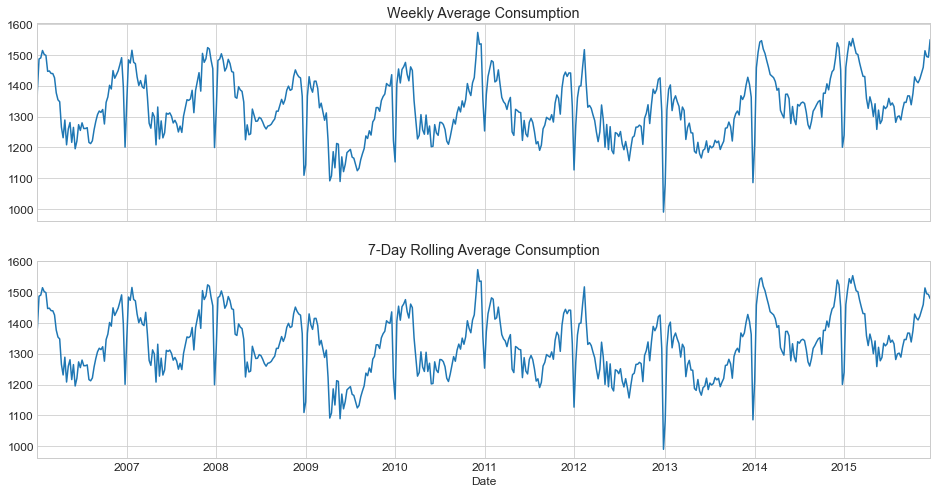

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8))

train.resample("W").Consumption.mean().plot(ax=ax1)
ax1.set_title("Weekly Average Consumption")

train.rolling(7).Consumption.mean().plot(ax=ax2)
ax2.set_title("7-Day Rolling Average Consumption")

plt.show()

> These are the same plots using different ways of accomplishing a weekly average of consumption.

## 4. Group the electricity consumption time series by month of year, to explore annual seasonality.

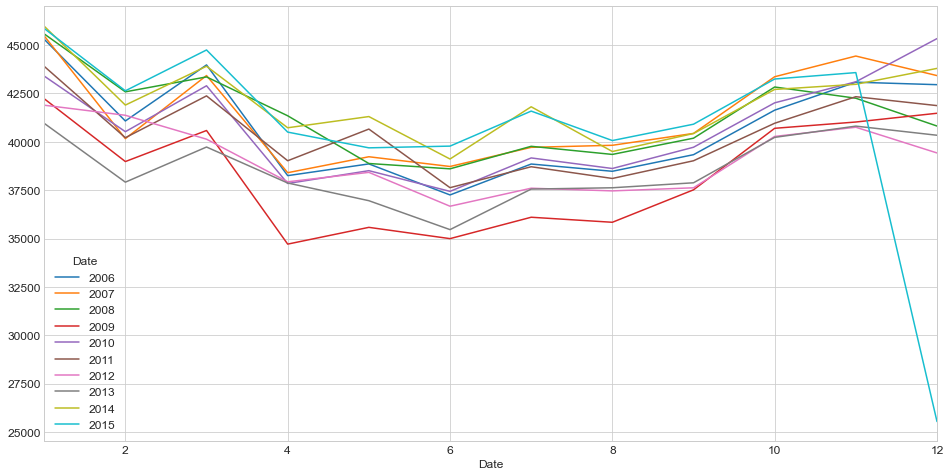

In [20]:
train.groupby([train.index.year, train.index.month]).Consumption.sum().unstack(0).plot()
plt.show()

> Looks like consumption is higher in the winter months, and declines slightly starting in the late spring through the early fall

## 5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

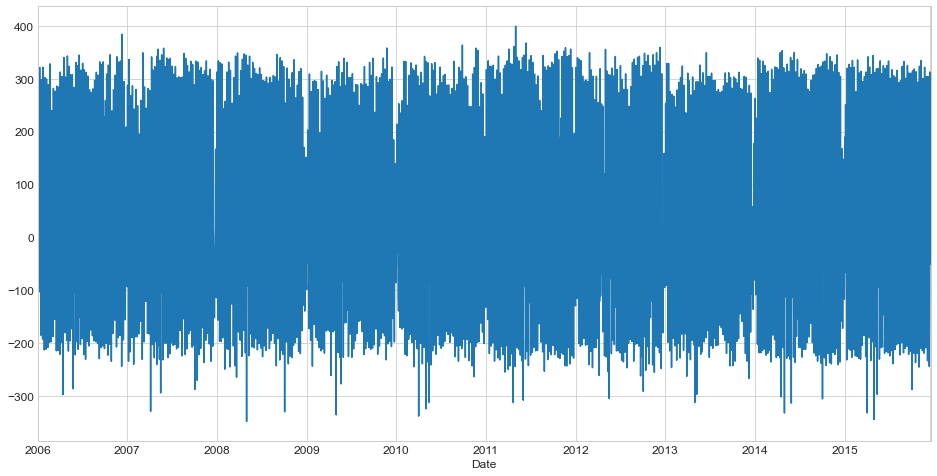

In [21]:
train.Consumption.diff().plot()
plt.show()

> Considering daily consumption is in the thousands, the variance day to day is not that significant (see y axis).

## 6. Plot a time series decomposition. Takeaways?

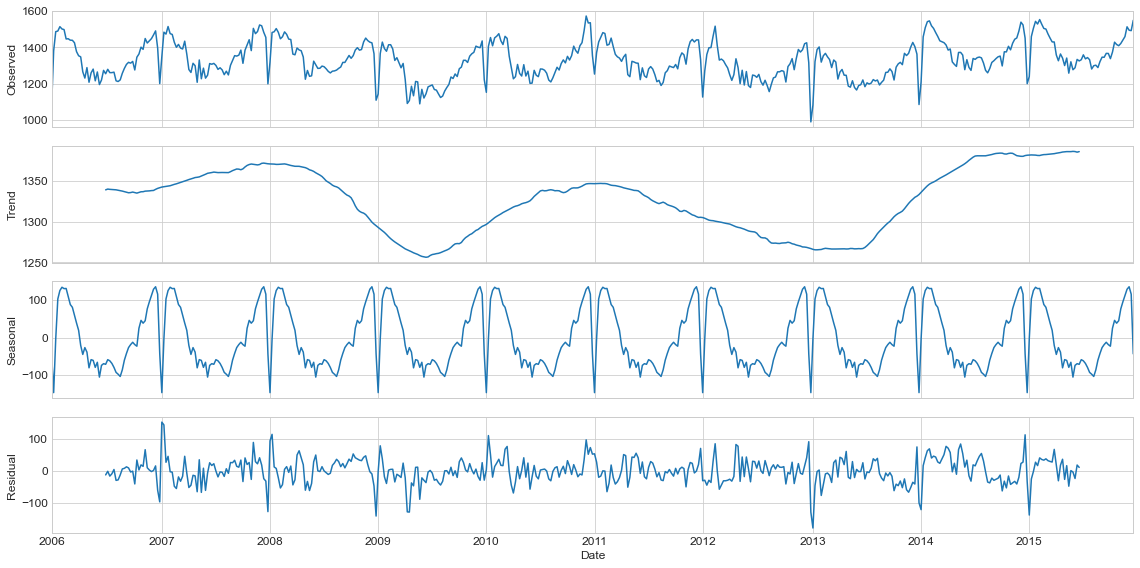

In [22]:
decomposition = sm.tsa.seasonal_decompose(train.resample("W").Consumption.mean())

fig = decomposition.plot()